<a href="https://colab.research.google.com/github/HienPham2k1/Python/blob/main/Ph%E1%BA%A1m_Th%E1%BB%8B_Thu_Hi%E1%BB%81n_RFM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
ecommerce=pd.read_excel('/content/ecommerce retail.xlsx')
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
ecommerce.info()
ecommerce['InvoiceDate'].dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


dtype('<M8[ns]')



*   Tại các cột Description và CustomerID có giá trị Null
*   InvoiceNo cần type là int

*   StockCode cần type là str
*   CustomerID cần type là int










In [ ]:
ecommerce=ecommerce.dropna()
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB




*   trong Country chỉ cần giao dịch tại UK nên loại bỏ hết các khu vực khác
*   InvoiceNo có những đơn hàng bị Close nên loại bỏ hết các giá trị này




In [ ]:
ecommerce_cleaned = ecommerce[~ecommerce['InvoiceNo'].astype(str).str.contains('C')]
ecommerce_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [ ]:
ecommerce_cleaned2=ecommerce_cleaned[ecommerce_cleaned['Country']=='United Kingdom']
ecommerce_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [ ]:
#chuyển type của InvoiceNo thành int
#chuyển type của CustomerID thành int
ecommerce_cleaned2['InvoiceNo']=ecommerce_cleaned2['InvoiceNo'].astype(int)
ecommerce_cleaned2['CustomerID']=ecommerce_cleaned2['CustomerID'].astype(int)
ecommerce_cleaned2.info()



*   Quantity phải lớn hơn 0
*   UnitPrice phải lớn hơn 0




In [ ]:
ecommerce_cleaned2=ecommerce_cleaned2[ecommerce_cleaned2['Quantity']>0 ]
ecommerce_cleaned2=ecommerce_cleaned2[ecommerce_cleaned2['UnitPrice']>0 ]
ecommerce_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  int64         
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  int64         
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 24.3+ MB




*   Thời gian của khảo sát là các giao dịch từ 01/12/2010 đến 09/12/2011 vậy nên các giao dịch khác ngoài thời gian này sẽ bị loại bỏ



In [ ]:
ecommerce_cleaned3=ecommerce_cleaned2[ecommerce_cleaned2['InvoiceDate']>='12/01/2010' ]
ecommerce_cleaned4=ecommerce_cleaned2[ecommerce_cleaned2['InvoiceDate']<'12/10/2011' ]
ecommerce_cleaned4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  int64         
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  int64         
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 24.3+ MB


In [ ]:
transaction=ecommerce_cleaned4.sort_values('InvoiceDate',ascending=False)
transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom
541879,581585,22726,ALARM CLOCK BAKELIKE GREEN,8,2011-12-09 12:31:00,3.75,15804,United Kingdom


RECENCY

In [ ]:
# lần mua hàng gần nhất của từng khách hàng
last_order=transaction.groupby('CustomerID')['InvoiceDate'].max()
last_order.info()
last_order.head()

<class 'pandas.core.series.Series'>
Index: 3920 entries, 12346 to 18287
Series name: InvoiceDate
Non-Null Count  Dtype         
--------------  -----         
3920 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 61.2 KB


,InvoiceDate
CustomerID,
12346,2011-01-18 10:01:00
12747,2011-12-07 14:34:00
12748,2011-12-09 12:20:00
12749,2011-12-06 09:56:00
12820,2011-12-06 15:12:00


In [ ]:
Recency=pd.DataFrame(last_order)
Recency.head()

,InvoiceDate
CustomerID,
12346,2011-01-18 10:01:00
12747,2011-12-07 14:34:00
12748,2011-12-09 12:20:00
12749,2011-12-06 09:56:00
12820,2011-12-06 15:12:00


In [ ]:
# Chuyển đổi cột ngày tháng thành kiểu dữ liệu datetime
Recency['InvoiceDate'] = pd.to_datetime(Recency['InvoiceDate'], format='%d/%m/%Y')

# Đặt ngày mốc 31/12/2011
ngay_moc = pd.to_datetime('31/12/2011', format='%d/%m/%Y')

# Tính khoảng thời gian giữa ngày mốc và các mốc thời gian trong DataFrame
Recency['length_time'] = ngay_moc-Recency['InvoiceDate']
Recency.head()


,InvoiceDate,length_time
CustomerID,,
12346,2011-01-18 10:01:00,346 days 13:59:00
12747,2011-12-07 14:34:00,23 days 09:26:00
12748,2011-12-09 12:20:00,21 days 11:40:00
12749,2011-12-06 09:56:00,24 days 14:04:00
12820,2011-12-06 15:12:00,24 days 08:48:00


In [ ]:
#cho điểm các giá trị
# quantile(0.2)<=x mang giá trị 5
# quantile(0.2)<x<=quantile(0.4) có giá trị 4
# quantile(0.4)<x<=quantile(0.6) có giá trị 3
# quantile(0.6)<x<=quantile(0.8) có giá trị 2
# quantile(0.8)<x có giá trị 1
# Tính quantile
quantile_20 = Recency['length_time'].quantile(0.2)
quantile_40 = Recency['length_time'].quantile(0.4)
quantile_60 = Recency['length_time'].quantile(0.6)
quantile_80 = Recency['length_time'].quantile(0.8)

# Xếp hạng các giá trị dựa trên quantile
def R_score(value, q20, q40, q60, q80):
    if value <= q20:
        return 5
    elif q20 < value <= q40:
        return 4
    elif q40 < value <= q60:
        return 3
    elif q60 < value <= q80:
        return 2
    else:
        return 1

Recency['R_score'] = Recency['length_time'].apply(lambda x: R_score(x, quantile_20, quantile_40,quantile_60,quantile_80))
Recency.head()



,InvoiceDate,length_time,R_score
CustomerID,,,
12346,2011-01-18 10:01:00,346 days 13:59:00,1
12747,2011-12-07 14:34:00,23 days 09:26:00,5
12748,2011-12-09 12:20:00,21 days 11:40:00,5
12749,2011-12-06 09:56:00,24 days 14:04:00,5
12820,2011-12-06 15:12:00,24 days 08:48:00,5


In [ ]:
Recency1=Recency.reset_index(drop=False)
Recency1['length_time']=Recency1['length_time'].dt.total_seconds()/(24*3600)
Recency1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   3920 non-null   int64         
 1   InvoiceDate  3920 non-null   datetime64[ns]
 2   length_time  3920 non-null   float64       
 3   R_score      3920 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 122.6 KB


FREQUENCY

In [ ]:
#tính tổng số đơn hàng mà một customerID đã mua
total_order= transaction.groupby('CustomerID')['InvoiceNo'].nunique()
total_order.head()

,InvoiceNo
CustomerID,
12346,1
12747,11
12748,209
12749,5
12820,4


In [ ]:
Frequency=pd.DataFrame(total_order)
Frequency=Frequency.sort_values('InvoiceNo',ascending=True)
Frequency.head()

,InvoiceNo
CustomerID,
12346,1
17309,1
15396,1
14241,1
15397,1


In [ ]:
#cho điểm các giá trị
# quantile(0.2)<=x mang giá trị 1
# quantile(0.2)<x<=quantile(0.4) có giá trị 2
# quantile(0.4)<x<=quantile(0.6) có giá trị 3
# quantile(0.6)<x<=quantile(0.8) có giá trị 4
# quantile(0.8)<x có giá trị 5
# Tính quantile
quantile_20 = Frequency['InvoiceNo'].quantile(0.2)
quantile_40 = Frequency['InvoiceNo'].quantile(0.4)
quantile_60 = Frequency['InvoiceNo'].quantile(0.6)
quantile_80 = Frequency['InvoiceNo'].quantile(0.8)

# Xếp hạng các giá trị dựa trên quantile
def F_score(value, q20, q40, q60, q80):
    if value <= q20:
        return 1
    elif q20 < value <= q40:
        return 2
    elif q40 < value <= q60:
        return 3
    elif q60 < value <= q80:
        return 4
    else:
        return 5

Frequency['F_score'] = Frequency['InvoiceNo'].apply(lambda x: F_score(x, quantile_20, quantile_40,quantile_60,quantile_80))
Frequency.head()
Frequency.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3920 entries, 12346 to 12748
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   InvoiceNo  3920 non-null   int64
 1   F_score    3920 non-null   int64
dtypes: int64(2)
memory usage: 91.9 KB


MONETARY


In [ ]:
#tính tổng giá trị các đơn hàng
transaction['total_price']=transaction['Quantity']*transaction['UnitPrice']
#tính tổng giá trị đơn hàng của từng khách hàng
customer_pay=transaction.groupby('CustomerID')['total_price'].sum()
customer_pay.head()

,total_price
CustomerID,
12346,77183.60
12747,4196.01
12748,33719.73
12749,4090.88
12820,942.34


In [ ]:
Monetary=pd.DataFrame(customer_pay)
Monetary=Monetary.sort_values('total_price',ascending=True)
Monetary.head()

,total_price
CustomerID,
16738,3.75
14792,6.20
16454,6.90
17956,12.75
16878,13.30


In [ ]:
#cho điểm các giá trị
# quantile(0.2)<=x mang giá trị 1
# quantile(0.2)<x<=quantile(0.4) có giá trị 2
# quantile(0.4)<x<=quantile(0.6) có giá trị 3
# quantile(0.6)<x<=quantile(0.8) có giá trị 4
# quantile(0.8)<x có giá trị 5
# Tính quantile
quantile_20 = Monetary['total_price'].quantile(0.2)
quantile_40 = Monetary['total_price'].quantile(0.4)
quantile_60 = Monetary['total_price'].quantile(0.6)
quantile_80 = Monetary['total_price'].quantile(0.8)

# Xếp hạng các giá trị dựa trên quantile
def M_score(value, q20, q40, q60, q80):
    if value <= q20:
        return 1
    elif q20 < value <= q40:
        return 2
    elif q40 < value <= q60:
        return 3
    elif q60 < value <= q80:
        return 4
    else:
        return 5

Monetary['M_score'] = Monetary['total_price'].apply(lambda x: M_score(x, quantile_20, quantile_40,quantile_60,quantile_80))
Monetary.head()


,total_price,M_score
CustomerID,,
16738,3.75,1
14792,6.20,1
16454,6.90,1
17956,12.75,1
16878,13.30,1


In [ ]:
#merge các bảng với nhau bằng CustomerID
Merge_table=Recency1.merge(Frequency,on='CustomerID',how='left')
Merge_table=Merge_table.merge(Monetary,on='CustomerID',how='left')
Merge_table['RFM_score'] = Merge_table[['R_score', 'F_score', 'M_score']].astype(str).agg(''.join, axis=1)
Merge_table_reset=Merge_table.reset_index(drop=False)
Merge_table_reset.head()


,index,CustomerID,InvoiceDate,length_time,R_score,InvoiceNo,F_score,total_price,M_score,RFM_score
0,0,12346,2011-01-18 10:01:00,346.582639,1,1,1,77183.60,5,115
1,1,12747,2011-12-07 14:34:00,23.393056,5,11,5,4196.01,5,555
2,2,12748,2011-12-09 12:20:00,21.486111,5,209,5,33719.73,5,555
3,3,12749,2011-12-06 09:56:00,24.586111,5,5,4,4090.88,5,545
4,4,12820,2011-12-06 15:12:00,24.366667,5,4,4,942.34,4,544


In [ ]:
segment=pd.read_excel('/content/segment.xlsx')
segment['RFM Score']=segment['RFM Score'].astype(str)
segment=segment.set_index('RFM Score')
segment.head()


,Segment
RFM Score,
555,Champions
554,Champions
544,Champions
545,Champions
454,Champions


In [ ]:
Segment_customer=Merge_table_reset.merge(segment,left_on='RFM_score',right_on='RFM Score',how='left')
Segment_customer.head()
Segment_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        3920 non-null   int64         
 1   CustomerID   3920 non-null   int64         
 2   InvoiceDate  3920 non-null   datetime64[ns]
 3   length_time  3920 non-null   float64       
 4   R_score      3920 non-null   int64         
 5   InvoiceNo    3920 non-null   int64         
 6   F_score      3920 non-null   int64         
 7   total_price  3920 non-null   float64       
 8   M_score      3920 non-null   int64         
 9   RFM_score    3920 non-null   object        
 10  Segment      3920 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 337.0+ KB


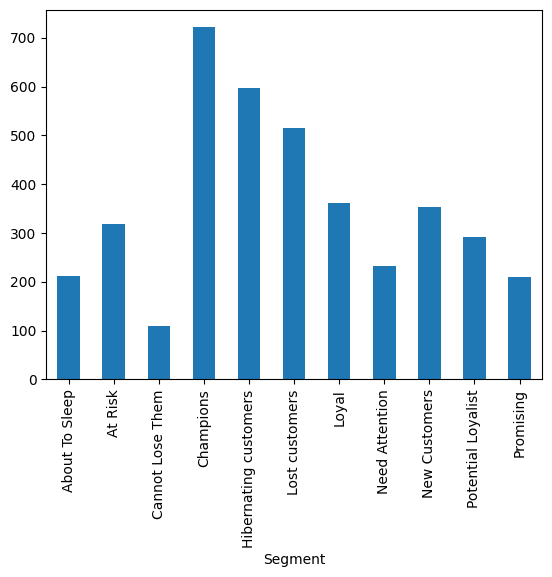

In [ ]:
Segment_customer1=Segment_customer.groupby('Segment')['CustomerID'].count()
Segment_customer1.plot(kind='bar')
plt.show()

In [ ]:
Segment_customer=pd.DataFrame(Segment_customer)
Segment_customer.head()

,index,CustomerID,InvoiceDate,length_time,R_score,InvoiceNo,F_score,total_price,M_score,RFM_score,Segment
0,0,12346,2011-01-18 10:01:00,346.582639,1,1,1,77183.60,5,115,Cannot Lose Them
1,1,12747,2011-12-07 14:34:00,23.393056,5,11,5,4196.01,5,555,Champions
2,2,12748,2011-12-09 12:20:00,21.486111,5,209,5,33719.73,5,555,Champions
3,3,12749,2011-12-06 09:56:00,24.586111,5,5,4,4090.88,5,545,Champions
4,4,12820,2011-12-06 15:12:00,24.366667,5,4,4,942.34,4,544,Champions


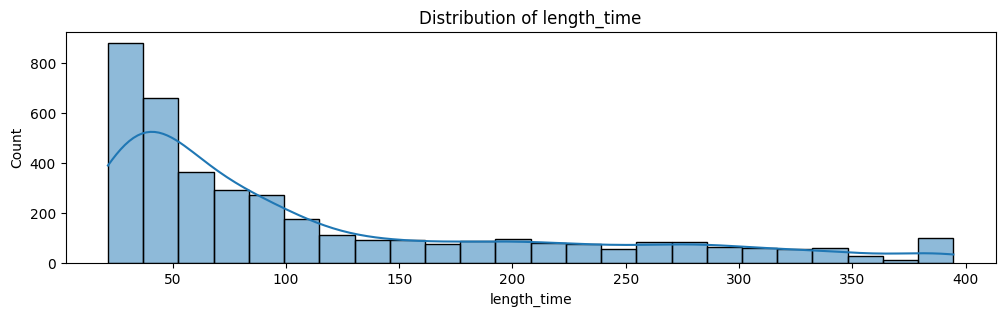

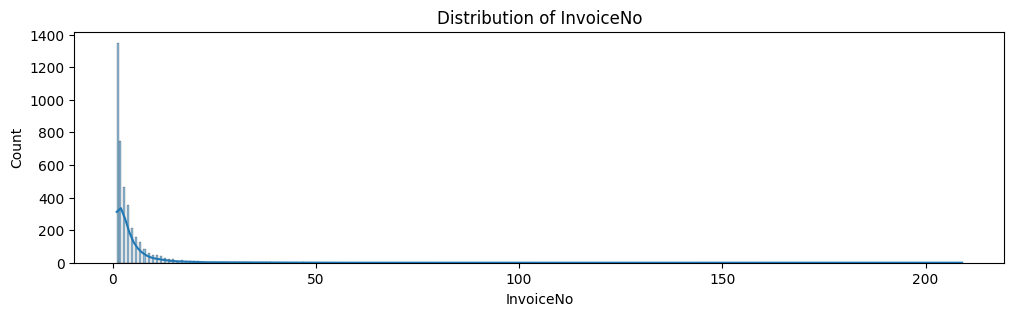

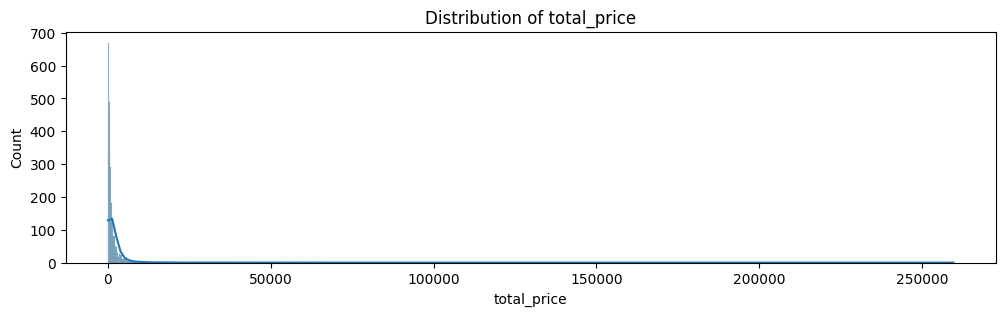

In [ ]:
colnames = ['length_time', 'InvoiceNo', 'total_price']

# Vẽ phân phối cho mỗi cột
for col in colnames:
    if col in Segment_customer:
        fig, ax = plt.subplots(figsize=(12, 3))
        # Vẽ histogram hoặc đồ thị mật độ
        sns.histplot(Segment_customer[col], kde=True, ax=ax)
        ax.set_title(f'Distribution of {col}')
        plt.show()

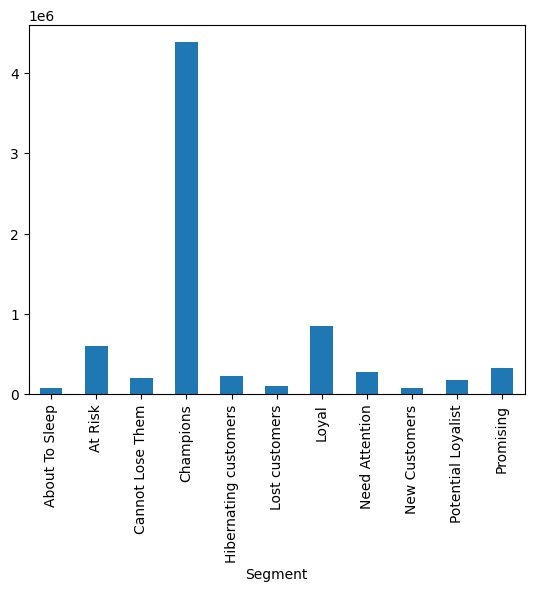

In [ ]:
Segment_customer2=Segment_customer.groupby('Segment')['total_price'].sum()
Segment_customer2.plot(kind='bar')
plt.show()